<a href="https://colab.research.google.com/github/Raphlawren/DLSC804/blob/main/DLSC804proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import cudf

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
import pandas as pd
import numpy as np

df_app = pd.read_csv('/content/application_record.csv')
df_cc = pd.read_csv('/content/credit_record.csv')

#print(df_app.head())
#print(df_cc.shape)
#print(df_cc.head())

#Group by the ID and fill with the mode of the status
# mode_stat = df_cc.groupby('ID')['STATUS'].agg(lambda x: x.mode()[0]).reset_index()
#print(mode_stat.head())

#Check the number of unique values in mode
#print(mode_stat.STATUS.unique())

#Check the duplicates
# mode_stat.duplicated(subset='ID').sum()


In [ ]:
df_app['FLAG_MOBIL'].nunique()

1

In [ ]:
df_app.head()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
print(df_cc.shape)
df_cc.head()

(1048575, 3)


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
# Group by the ID and filled by the mode of the status
mode_stat = df_cc.groupby('ID')['STATUS'].agg(lambda x: x.mode()[0]).reset_index()

In [ ]:
mode_stat.STATUS.unique()

array(['0', 'X', 'C', '1', '5', '2'], dtype=object)

In [ ]:
# check duplicates in th e credit card

mode_stat.duplicated(subset='ID').sum()

np.int64(0)

In [ ]:
#Checking duplicates in the applicants dataset
df_app.duplicated(subset= "ID").sum()

np.int64(47)

In [ ]:
# get all the duplicated rows
dupes = df_app[df_app['ID'].duplicated(keep=False)]

#extract the missing rows
dupes_clean = dupes[dupes.isna().any(axis=1)]

#drop all the missing rows
df_app = df_app.drop(dupes_clean.index)



In [ ]:
df_app.duplicated(subset='ID').sum()

np.int64(23)

In [ ]:
df_app.shape

(438531, 18)

In [ ]:
#CHecking shape of the credit column

mode_stat.shape

(45985, 2)

In [ ]:
# df_cc.duplicated(subset='ID').sum()

In [ ]:
df = pd.merge(df_app, mode_stat, on='ID')

In [ ]:
df.shape

(36457, 19)

In [ ]:
df.duplicated(subset='ID').sum()

np.int64(0)

In [ ]:
# Types of valiues we have in the Status column

df.STATUS.unique()

array(['C', 'X', '0', '1', '5', '2'], dtype=object)

<Axes: >

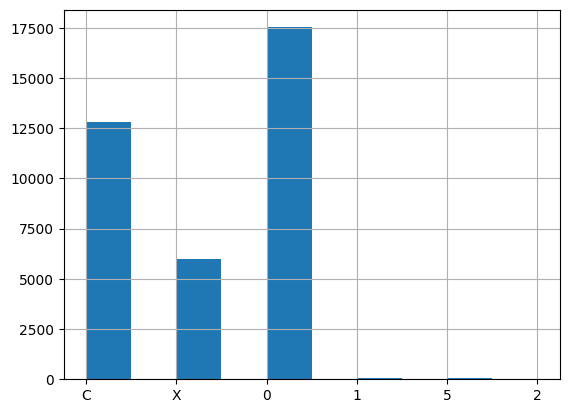

In [ ]:
import matplotlib.pyplot as plt

df.STATUS.hist()

In [ ]:
df.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [ ]:
# Fillling missing values in occupation type based on the income type and education type
df['OCCUPATION_TYPE'] = df.groupby(['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE'])['OCCUPATION_TYPE'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'nan'))

In [ ]:
# df.CNT_FAM_MEMBERS = df['CNT_FAM_MEMBERS'].astype('int')
# Converting the age to years
df['Age']  = abs(df['DAYS_BIRTH'] / 365).round().astype('int')
df['Employment Years'] = abs(df['DAYS_EMPLOYED']/365).round().astype('int')
#dropping the old columns
df.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  FLAG_MOBIL           36457 non-null  int64  
 11  FLAG_WORK_PHONE      36457 non-null  int64  
 12  FLAG_PHONE           36457 non-null  int64  
 13  FLAG_EMAIL           36457 non-null  int64  
 14  OCCUPATION_TYPE      36457 non-null  object 
 15  CNT_FAM_MEMBERS      36457 non-null 

In [ ]:
data = df.iloc[:, 1:19]

In [ ]:
# encoding the target class

# 1 means Good Credit,  2 means Bad Credit

def map_two_classes(value):
  if value in ['C', 'X']:
    return 1  # Good Credit
  else:
    return 0  # Bad Credit

#Apply the function to the target column

df['STATUS'] = df['STATUS'].apply(map_two_classes)

#display the encoded labels
print(df['STATUS'].value_counts())

STATUS
1    18805
0    17652
Name: count, dtype: int64


In [ ]:
df['STATUS'].value_counts().values

array([18805, 17652])

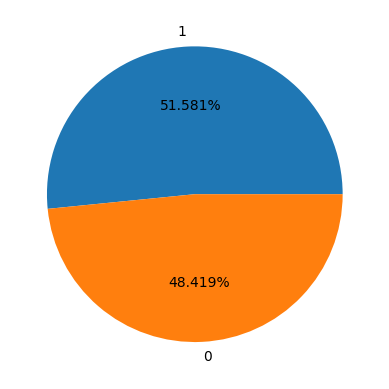

In [ ]:
#View the chart of the status
import matplotlib.pyplot as plt

label = df['STATUS'].unique()
size = df['STATUS'].value_counts().values

plt.pie(size, labels=label, autopct="%1.3f%%")
plt.show()

In [ ]:
# df.head()

In [ ]:
# df.info()

In [ ]:
#Standardizing continous numerical features
from sklearn.preprocessing import LabelEncoder
category_column = df.select_dtypes(include=['object']).columns.tolist()

#Fitting the model
label = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in category_column:
  df[col] = label.fit_transform(df[col])

#print the top 5 rows
# print(df.head())

In [ ]:
# #Convert Days of Birth to years
# df['AGE'] = abs(df['DAYS_BIRTH']/365).round().astype(int)
# df['EMPLOYED YEARS'] = abs(df['DAYS_EMPLOYED']/365).round().astype(int)
# df.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED'], axis=1, inplace=True)

In [ ]:
# print(df.head())

In [ ]:
#move target column to the end
df = df[[col for col in df.columns if col != 'STATUS'] + ['STATUS']]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  int64  
 2   FLAG_OWN_CAR         36457 non-null  int64  
 3   FLAG_OWN_REALTY      36457 non-null  int64  
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  int64  
 7   NAME_EDUCATION_TYPE  36457 non-null  int64  
 8   NAME_FAMILY_STATUS   36457 non-null  int64  
 9   NAME_HOUSING_TYPE    36457 non-null  int64  
 10  FLAG_MOBIL           36457 non-null  int64  
 11  FLAG_WORK_PHONE      36457 non-null  int64  
 12  FLAG_PHONE           36457 non-null  int64  
 13  FLAG_EMAIL           36457 non-null  int64  
 14  OCCUPATION_TYPE      36457 non-null  int64  
 15  CNT_FAM_MEMBERS      36457 non-null 

In [ ]:
df1 = df.copy()

In [ ]:
df1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Age,Employment Years,STATUS
0,5008804,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,10,2.0,33,12,1
1,5008805,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,10,2.0,33,12,1
2,5008806,1,1,1,0,112500.0,4,4,1,1,1,0,0,0,16,2.0,59,3,1
3,5008808,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,52,8,1
4,5008809,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,52,8,1


In [ ]:
# df1.iloc[:, 1:18] = df1.iloc[:, 1:18].astype(float)

In [ ]:
# df1.iloc[:, 1:18] = df.iloc[:, 1:18]

In [ ]:
df1.iloc[:, 1:18] = StandardScaler().fit_transform(df1.iloc[:, 1:18])
data_matrix = df.values

<ipython-input-38-01c98cdd49ef>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.42522384  1.42522384  1.42522384 ... -0.70164417 -0.70164417
  1.42522384]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.iloc[:, 1:18] = StandardScaler().fit_transform(df1.iloc[:, 1:18])
<ipython-input-38-01c98cdd49ef>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.27812575  1.27812575  1.27812575 ... -0.78239563 -0.78239563
 -0.78239563]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.iloc[:, 1:18] = StandardScaler().fit_transform(df1.iloc[:, 1:18])
<ipython-input-38-01c98cdd49ef>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.69833838 0.69833838 0.69833838 ... 0.69833838 0.69833838 0.6

In [ ]:
X = data_matrix[:, 1:18]
y = data_matrix[:, 18]

In [ ]:
y

array([1., 1., 1., ..., 1., 0., 0.])

In [ ]:
from sklearn.preprocessing import normalize, StandardScaler
X = normalize(X, norm='l1')

In [ ]:
print(X)

[[2.33879286e-06 2.33879286e-06 2.33879286e-06 ... 4.67758571e-06
  7.71801642e-05 2.80655143e-05]
 [2.33879286e-06 2.33879286e-06 2.33879286e-06 ... 4.67758571e-06
  7.71801642e-05 2.80655143e-05]
 [8.88146793e-06 8.88146793e-06 8.88146793e-06 ... 1.77629359e-05
  5.24006608e-04 2.66444038e-05]
 ...
 [0.00000000e+00 0.00000000e+00 6.34682881e-06 ... 1.26936576e-05
  2.15792179e-04 2.53873152e-05]
 [0.00000000e+00 0.00000000e+00 3.52635421e-06 ... 7.05270842e-06
  1.72791356e-04 7.05270842e-06]
 [8.88454533e-06 0.00000000e+00 8.88454533e-06 ... 8.88454533e-06
  2.22113633e-04 2.66536360e-05]]


In [ ]:
# # Standardizing continous numerical features
# continous_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# # Fitting the model
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(df[continous_columns])

# # Converting to a DataFrame
# scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continous_columns))

# #combining with the original dataset
# scaled_data = pd.concat([df.drop(columns=continous_columns), scaled_df], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#### DECISION TREE

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight
w_train = compute_sample_weight('balanced', y_train)

In [ ]:
#Training with Decision Tree

dt = DecisionTreeClassifier(max_depth = 12, random_state= 35)

#Fit the model
dt.fit(X_train, y_train, w_train)

DecisionTreeClassifier(max_depth=12, random_state=35)

In [ ]:
y_pred_dt = dt.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print('Decision Tree ROC-AUC score : {0:.3f}'.format(roc_auc_dt))

Decision Tree ROC-AUC score : 0.620


### SVM

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svm = LinearSVC(random_state=31, loss='hinge', fit_intercept=False)

svm.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(fit_intercept=False, loss='hinge', random_state=31)

In [ ]:
y_pred_svm = svm.decision_function(X_test)

In [ ]:
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("SVM ROC-AUC score: {0:.3f}".format(roc_auc_svm))

SVM ROC-AUC score: 0.518


##


In [ ]:
correlation_values = abs()